### https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

### https://www.tiingo.com/

### https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

### https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/Untitled.ipynb

### https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

In [1]:
# key generated via tiingo
key = "635d3994c9d952348c703f2aaaf01fabf99327db"

In [3]:
#Data collection
#Install pip install pandas_datareader
import pandas_datareader as pdr

In [4]:
df = pdr.get_data_tiingo('AAPL',api_key=key)

In [7]:
# Saving dataframe to csv since tiingo allows only 50 free API call
df.to_csv('AAPL.csv')

In [8]:
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-07 00:00:00+00:00,101.87,102.83,100.96,102.39,35915810,23.683424,23.906611,23.471861,23.804317,143663240,0.0,1.0
1,AAPL,2016-03-08 00:00:00+00:00,101.03,101.76,100.40,100.78,31182194,23.488135,23.657850,23.341668,23.430013,124728776,0.0,1.0
2,AAPL,2016-03-09 00:00:00+00:00,101.12,101.58,100.27,101.31,27201683,23.509059,23.616003,23.311445,23.553231,108806732,0.0,1.0
3,AAPL,2016-03-10 00:00:00+00:00,101.17,102.24,100.15,101.41,33513577,23.520683,23.769444,23.283547,23.576480,134054308,0.0,1.0
4,AAPL,2016-03-11 00:00:00+00:00,102.26,102.28,101.50,102.24,27408237,23.774094,23.778743,23.597404,23.769444,109632948,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-03-01 00:00:00+00:00,127.79,127.930,122.79,123.75,116307892,127.79,127.930,122.79,123.75,116307892,0.0,1.0
1255,AAPL,2021-03-02 00:00:00+00:00,125.12,128.720,125.01,128.41,102260945,125.12,128.720,125.01,128.41,102260945,0.0,1.0
1256,AAPL,2021-03-03 00:00:00+00:00,122.06,125.710,121.84,124.81,112966340,122.06,125.710,121.84,124.81,112966340,0.0,1.0
1257,AAPL,2021-03-04 00:00:00+00:00,120.13,123.600,118.62,121.75,178154975,120.13,123.600,118.62,121.75,178154975,0.0,1.0
1258,AAPL,2021-03-05 00:00:00+00:00,121.42,121.935,117.57,120.98,153766601,121.42,121.935,117.57,120.98,153766601,0.0,1.0


In [13]:
df1=df.reset_index()['close']
print(df1)

0       101.87
1       101.03
2       101.12
3       101.17
4       102.26
         ...  
1254    127.79
1255    125.12
1256    122.06
1257    120.13
1258    121.42
Name: close, Length: 1259, dtype: float64


In [23]:
print(type(df1.shape))
df1.shape

<class 'tuple'>


(1259, 1)

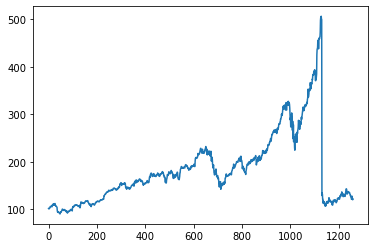

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of data, so we apply minmax scaler

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1.shape

(1259, 1)

In [19]:
df1

array([[0.02773301],
       [0.02571257],
       [0.02592904],
       ...,
       [0.07629585],
       [0.07165364],
       [0.07475646]])

In [29]:
# Stock price depends on previous day closing price. So training set should be continuous data(first 65%)then test set is next 35%
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size],df1[training_size:]
print('training_set.shape : ', train_data.shape)
print('test_set.shape : ', test_data.shape)

training_set.shape :  (818, 1)
test_set.shape :  (441, 1)


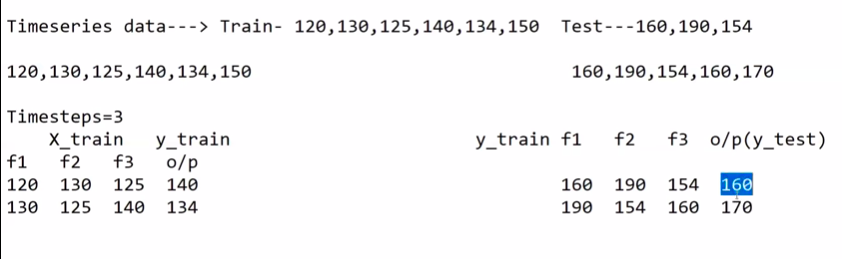

In [32]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [33]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
print(X_train[0].shape)
X_train[0]

(100, 1)


array([[0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.02867108],
       [0.02929645],
       [0.03425135],
       [0.03759471],
       [0.03718581],
       [0.03747444],
       [0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.   

In [37]:
y_train[0]

0.03367408298256164

In [38]:
print(X_train.shape, y_train.shape)

(717, 100) (717,)


In [45]:
print(X_test.shape), print(ytest.shape)
print(type(X_test)), print(type(ytest))

(340, 100, 1)
(340,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(None, None)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM. [time_step,features]is given as i/p to 1st LSTM layer
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
print('X_train.shape : ', X_train.shape)
X_train[0]

X_train.shape :  (717, 100, 1)


array([[0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.02867108],
       [0.02929645],
       [0.03425135],
       [0.03759471],
       [0.03718581],
       [0.03747444],
       [0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.   

### Create the Stacked LSTM model

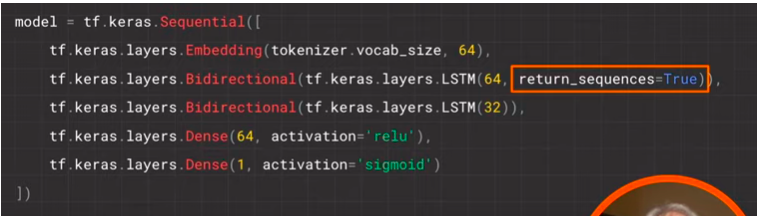

<b>We can have multiple(stacked) LSTM layer but we need to set "return_sequences to True" if we need to feed it to next layer. In above pic, we have only one return_sequences since its fed as i/p to next LSTM layer. Last LSTM layer doesn't need it</b>

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 19s 457ms/step - loss: 0.0202 - val_loss: 0.0501
Epoch 2/100
12/12 [==============================] - 3s 211ms/step - loss: 0.0029 - val_loss: 0.0253
Epoch 3/100
12/12 [==============================] - 3s 254ms/step - loss: 0.0015 - val_loss: 0.0256
Epoch 4/100
12/12 [==============================] - 3s 222ms/step - loss: 5.4179e-04 - val_loss: 0.0204
Epoch 5/100
12/12 [==============================] - 4s 301ms/step - loss: 4.5019e-04 - val_loss: 0.0199
Epoch 6/100
12/12 [==============================] - 5s 408ms/step - loss: 3.9855e-04 - val_loss: 0.0196
Epoch 7/100
12/12 [==============================] - 4s 362ms/step - loss: 3.8694e-04 - val_loss: 0.0191
Epoch 8/100
12/12 [==============================] - 4s 370ms/step - loss: 3.6341e-04 - val_loss: 0.0187
Epoch 9/100
12/12 [==============================] - 4s 305ms/step - loss: 4.3718e-04 - val_loss: 0.0182
Epoch 10/100
12/12 [==============================] - 3s 241ms/ste

### Lets Do the prediction and check performance metrics

In [53]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

### Transform back to original form

In [54]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculate RMSE metrics

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.97157442745893

In [56]:
math.sqrt(mean_squared_error(ytest,test_predict))

270.6985277934129

### Plotting - shift train predictions for plotting

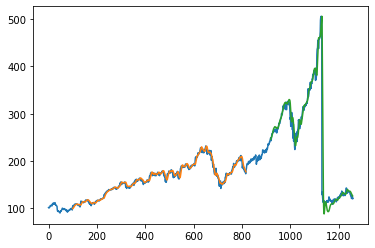

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]
[[         nan]
 [         nan]
 [         nan]
 ...
 [126.53607178]
 [126.13244629]
 [         nan]]


In [63]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print(trainPredictPlot)
print(testPredictPlot)

In [68]:
len(test_data)
print(test_data)

[[0.22821407]
 [0.24007216]
 [0.24591702]
 [0.25128082]
 [0.24978954]
 [0.24969333]
 [0.24630186]
 [0.24906795]
 [0.26003608]
 [0.25864101]
 [0.26246542]
 [0.26082983]
 [0.26034877]
 [0.25310884]
 [0.26328322]
 [0.26313891]
 [0.25876127]
 [0.26749248]
 [0.27033073]
 [0.27437162]
 [0.27393867]
 [0.26381239]
 [0.26674684]
 [0.27153337]
 [0.26797354]
 [0.27170174]
 [0.27629585]
 [0.27458809]
 [0.27182201]
 [0.27737823]
 [0.26999399]
 [0.28113049]
 [0.28502706]
 [0.28461816]
 [0.28064943]
 [0.28238124]
 [0.2870475 ]
 [0.28488274]
 [0.29512928]
 [0.28404089]
 [0.27343355]
 [0.24774504]
 [0.25654841]
 [0.2614552 ]
 [0.27201443]
 [0.26614552]
 [0.26491882]
 [0.28533975]
 [0.27037883]
 [0.26794949]
 [0.27939868]
 [0.28865905]
 [0.2886831 ]
 [0.29416717]
 [0.29373422]
 [0.27011425]
 [0.27937462]
 [0.27377029]
 [0.27706554]
 [0.28543596]
 [0.28478653]
 [0.27747444]
 [0.28586891]
 [0.29570655]
 [0.29565845]
 [0.29784726]
 [0.30393265]
 [0.32050511]
 [0.31930247]
 [0.3088635 ]
 [0.31162959]
 [0.31

In [71]:
#Selecting last 100 test data
x_input=test_data[341:].reshape(1,-1)
x_input.shape
print(x_input[0])

[0.08192423 0.07398677 0.07420325 0.07304871 0.06898376 0.06167168
 0.06535177 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296
 0.05017438 0.06008419 0.044546   0.04432952 0.04834636 0.05919423
 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077
 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287
 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334
 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237
 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628 0.09226699
 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527
 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587
 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721
 0.08851473 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023
 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177 0.10739627
 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839
 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633 0.09508

In [73]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.08192423331328924, 0.07398677089597111, 0.07420324714371618, 0.07304870715574258, 0.06898376428141911, 0.061671677690920024, 0.06535177390258567, 0.06381238725195432, 0.06111846061334936, 0.059410703547805144, 0.05943475646422125, 0.06316295850871917, 0.05017438364401683, 0.06008418520745634, 0.04454600120264579, 0.04432952495490078, 0.04834636199639203, 0.05919422730006013, 0.06900781719783522, 0.06819001803968727, 0.062489476849067915, 0.06164762477450386, 0.0701142513529765, 0.0694407696933253, 0.06956103427540589, 0.07206253758268188, 0.06987372218881538, 0.0666025255562237, 0.06806975345760674, 0.0649428743235117, 0.056548406494287384, 0.05972339146121464, 0.06179194227300061, 0.06313890559230306, 0.06905592303066743, 0.07788334335538183, 0.07874924834636199, 0.07841250751653633, 0.07675285628382439, 0.08036079374624172, 0.08187612748045697, 0.07562236921226695, 0.0791340950090198, 0.07713770294648226, 0.07562236921226695, 0.0902946482260974, 0.0901262778111846, 0.0922669873722

### Demonstrate prediction for next 30 days

In [76]:
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
     if(len(temp_input)>100):
        #print(temp_input)
        #Shifting array by 1 to select last 100 latest record
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
     else:
         x_input = x_input.reshape((1, n_steps,1))
         yhat = model.predict(x_input, verbose=0)
         print(yhat[0])
         # Adding new value to list which is then shifted by 1 to select last 100 record
         # in x_input=np.array(temp_input[1:]) in if block
         temp_input.extend(yhat[0].tolist())
         print(len(temp_input))
         lst_output.extend(yhat.tolist())
         i=i+1
    

print(lst_output)

[0.08395837]
101
1 day input [0.07398677 0.07420325 0.07304871 0.06898376 0.06167168 0.06535177
 0.06381239 0.06111846 0.0594107  0.05943476 0.06316296 0.05017438
 0.06008419 0.044546   0.04432952 0.04834636 0.05919423 0.06900782
 0.06819002 0.06248948 0.06164762 0.07011425 0.06944077 0.06956103
 0.07206254 0.06987372 0.06660253 0.06806975 0.06494287 0.05654841
 0.05972339 0.06179194 0.06313891 0.06905592 0.07788334 0.07874925
 0.07841251 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341
 0.0771377  0.07562237 0.09029465 0.09012628 0.09226699 0.08734817
 0.0911365  0.09991581 0.09770295 0.10013229 0.11148527 0.10710764
 0.10434155 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673
 0.10032471 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473
 0.09017438 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475
 0.12440168 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072
 0.11316897 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301
 0.10831028 0.10306675 0.09741431 0

In [77]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

1259


ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

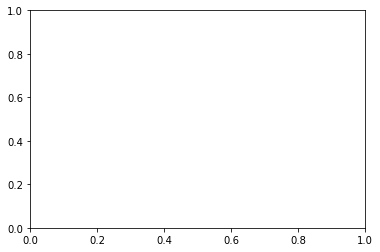

In [80]:
import matplotlib.pyplot as plt
print(len(df1))

plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))